In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [4]:
data.info

<bound method DataFrame.info of                            \tEmail  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ... 

In [5]:
data.describe

<bound method NDFrame.describe of                            \tEmail  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ..

In [6]:
data.head(2)

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20


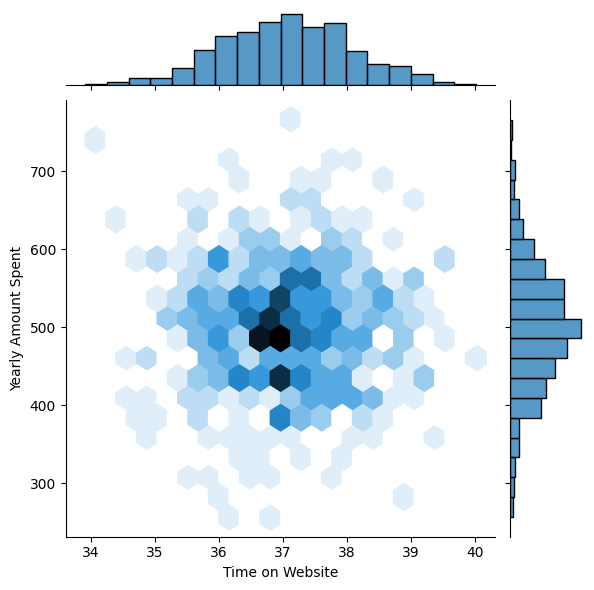

In [22]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data,kind='hex')

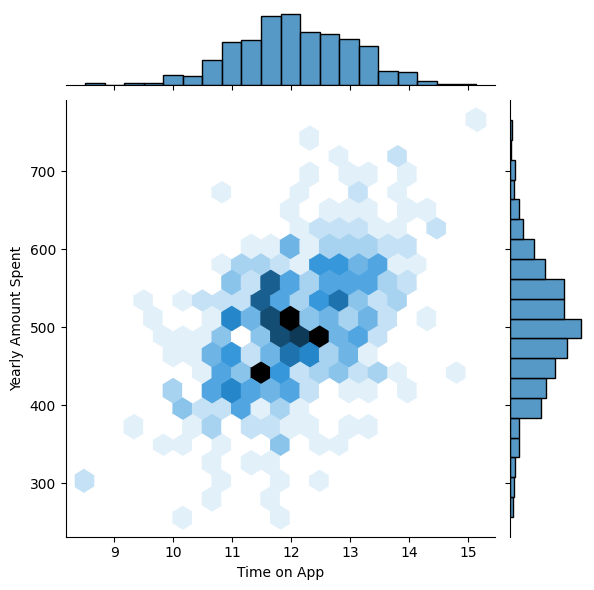

In [21]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,kind='hex')

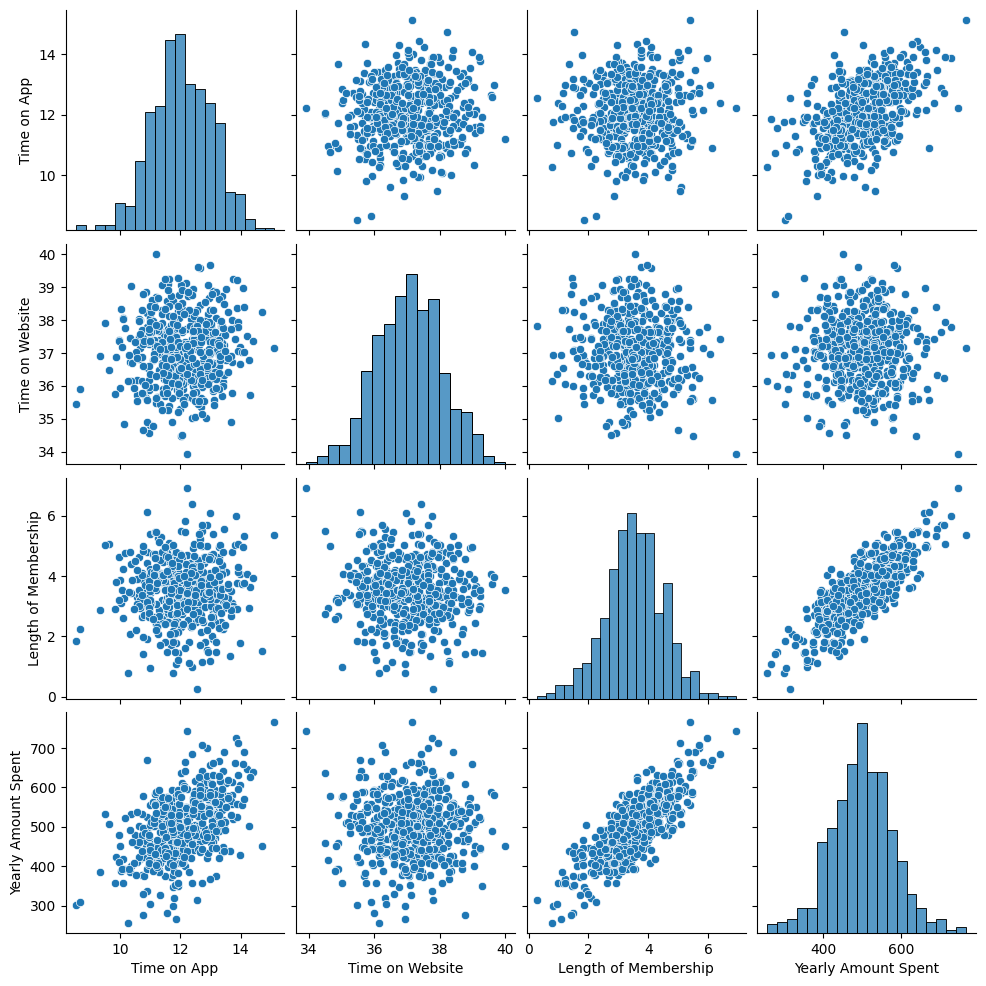

In [9]:
sns.pairplot(data)

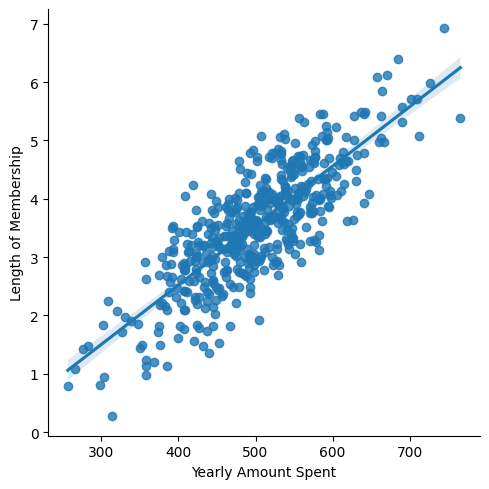

In [10]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=data)

In [11]:
data.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [29]:
y=data['Yearly Amount Spent']

In [35]:
x=data[['Time on App','Time on Website',]]

In [16]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
x_train

,Time on App,Time on Website
202,11.34,37.04
428,14.04,37.02
392,11.51,37.13
86,12.52,37.15
443,12.50,37.65
...,...,...
63,11.67,37.41
326,11.00,38.44
337,12.46,37.43
11,11.58,37.09


In [38]:
x_test

,Time on App,Time on Website
18,14.72,38.24
361,10.35,39.05
104,10.99,38.07
4,12.80,37.54
156,12.44,37.33
...,...,...
147,10.48,37.34
346,12.51,35.82
423,10.40,36.68
17,12.01,38.39


In [39]:
y_train

202    443.97
428    556.30
392    549.13
86     487.38
443    561.52
        ...  
63     483.16
326    505.23
337    440.00
11     522.34
351    533.40
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [40]:
y_test

18     452.32
361    401.03
104    410.07
4      599.41
156    586.16
        ...  
147    479.73
346    488.39
423    461.11
17     407.70
259    375.40
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression

In [48]:
lm=LinearRegression()

In [49]:
lm.fit(x_train,y_train)

LinearRegression()

In [50]:
lm.intercept_

np.float64(111.81025668525427)

In [51]:
lm.coef_

array([39.054266  , -2.24082794])

In [54]:
pd.DataFrame(lm.coef_,x.columns,columns=['coeff'])

,coeff
Time on App,39.054266
Time on Website,-2.240828


In [57]:
predict=lm.predict(x_train)

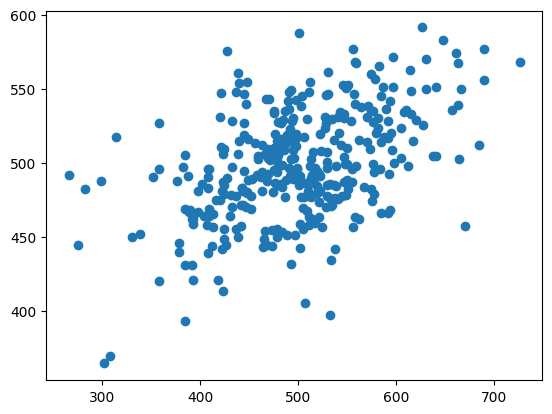

In [64]:
plt.scatter(y_train,predict)

In [65]:
from sklearn import metrics

In [66]:
metrics.mean_absolute_error(y_train,predict)

np.float64(53.844915104062174)

In [67]:
metrics.mean_squared_error(y_train,predict)

np.float64(4489.678205802478)

In [68]:
np.sqrt(metrics.mean_squared_error(y_train,predict))

np.float64(67.00506104618127)

C:\Users\Siddhardha\AppData\Local\Temp\ipykernel_21644\1044509735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-predict)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

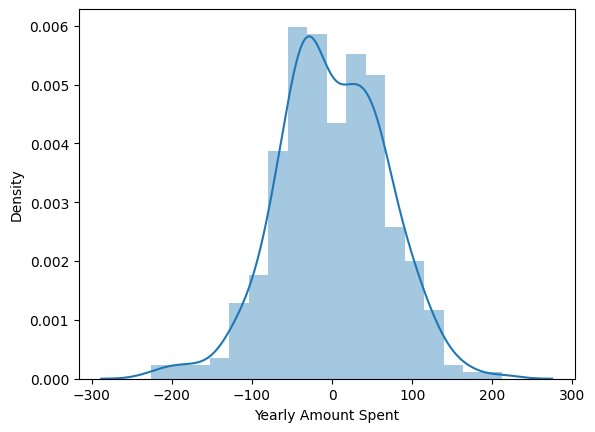

In [72]:
sns.distplot(y_train-predict)

Therefore, it is best to focus more in app.